In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
df = pd.read_csv('BTC-USD.csv')

df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
357,2024-06-13,68243.101563,68365.781250,66304.562500,66756.398438,66756.398438,28955204146
358,2024-06-14,66747.570313,67294.648438,65056.894531,66011.093750,66011.093750,27403884779
359,2024-06-15,66006.742188,66402.187500,65871.773438,66191.000000,66191.000000,14121265576
360,2024-06-16,66189.359375,66894.843750,66018.250000,66639.046875,66639.046875,13281140541
361,2024-06-17,66636.515625,67188.320313,65094.964844,66490.296875,66490.296875,30006354476
362,2024-06-18,66490.976563,66556.703125,64066.957031,65140.746094,65140.746094,39481285950
363,2024-06-19,65146.660156,65695.351563,64693.300781,64960.296875,64960.296875,21103423504
364,2024-06-20,64960.296875,66438.960938,64547.847656,64828.656250,64828.656250,25641109124
365,2024-06-21,64837.988281,65007.546875,63378.894531,64096.199219,64096.199219,26188171739
366,2024-06-22,64113.863281,64471.949219,63946.906250,64270.562500,64270.562500,21615667200


In [3]:
#CHECKING FOR NULL VALUES
df.isnull().values.any()

False

In [4]:
#drop adj close column
df=df.drop(columns=['Adj Close'])


([], [])

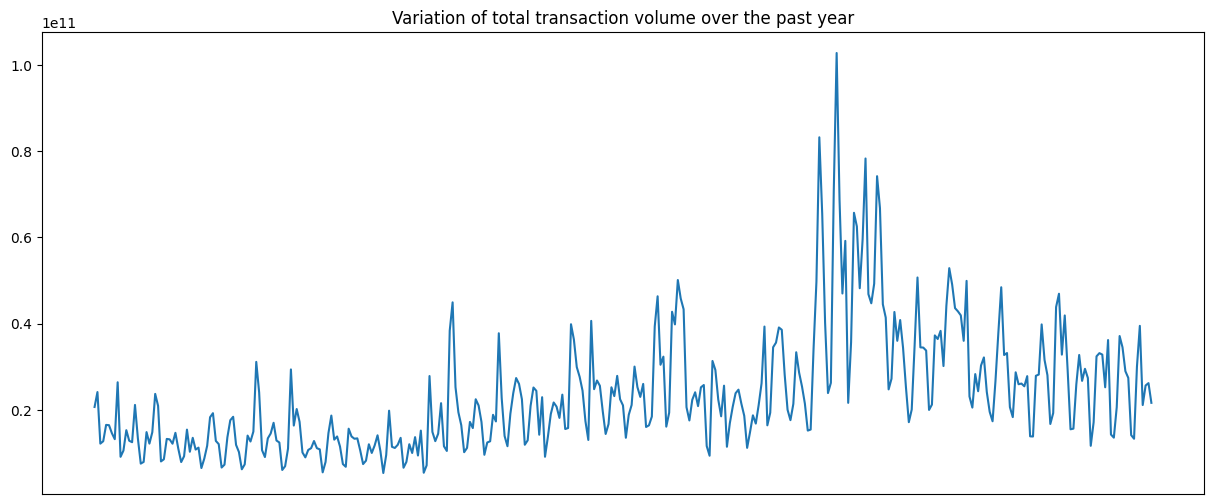

In [5]:
plt.title('Variation of total transaction volume over the past year')
plt.plot(df['Date'],df['Volume'])
plt.xticks([])



In [6]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2023-06-22,29995.935547,30495.998047,29679.158203,29912.281250,20653160491
1,2023-06-23,29896.382813,31389.539063,29845.214844,30695.468750,24115570085
2,2023-06-24,30708.738281,30804.148438,30290.146484,30548.695313,12147822496
3,2023-06-25,30545.150391,31041.271484,30327.943359,30480.261719,12703464114
4,2023-06-26,30480.523438,30636.029297,29955.744141,30271.130859,16493186997


Text(0.5, 0, 'date')

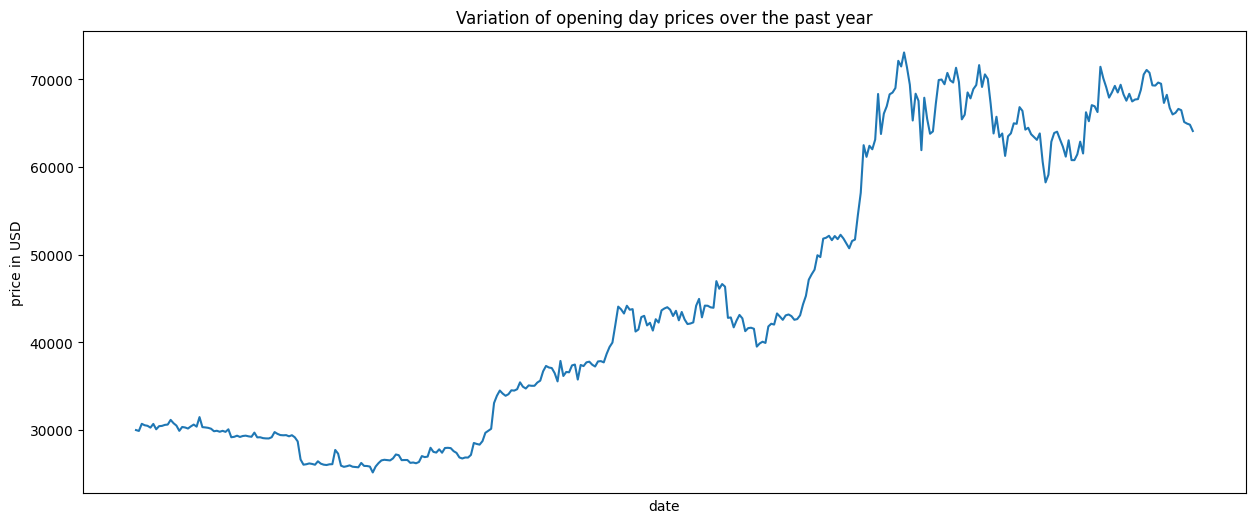

In [7]:
plt.plot(df['Date'],df['Open'])
plt.xticks([])
plt.title('Variation of opening day prices over the past year')
plt.ylabel('price in USD')
plt.xlabel('date')

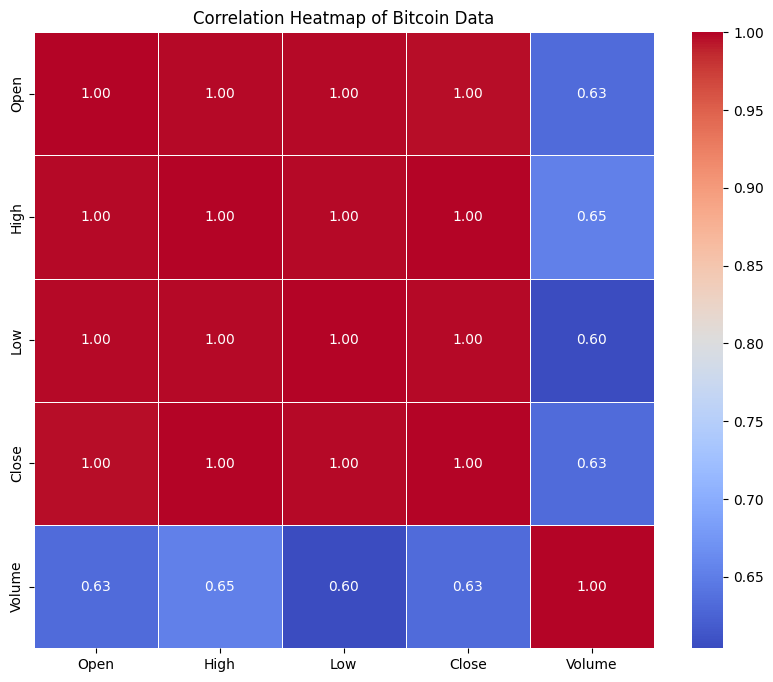

In [8]:
import seaborn as sns


# Calculate correlation matrix
corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Bitcoin Data')
plt.show()


### CANDLE STICK CHART

In [9]:
# import mplfinance as mpf
# df['Date'] = pd.to_datetime(df['Date'])
# # Assuming df is your DataFrame containing Bitcoin data
# # Make sure 'Date' column is datetime and set it as index
# df.set_index('Date', inplace=True)

# # Plot candlestick chart
# mpf.plot(df, type='candle',
# ylabel='Price', ylabel_lower='Volume')


## Moving Average

A moving average is a commonly used statistical technique in time series analysis. It calculates the average value of a series of data points over a specified period of time, updating as new data becomes available. The moving average smooths out short-term fluctuations or noise in the data, making it easier to identify trends or patterns.

For example, a 50-day moving average calculates the average value of the last 50 data points in a time series, updating with each new data point. Similarly, a 200-day moving average calculates the average value of the last 200 data points.

### How it helps:

- **Smoothing**: Moving averages help to smooth out short-term fluctuations or noise in the data, making it easier to identify underlying trends or patterns.
- **Trend Identification**: By smoothing out noise, moving averages make it easier to identify the direction of the trend in the data, whether it's upward, downward, or sideways.
- **Support and Resistance Levels**: Moving averages can act as dynamic support and resistance levels in the price chart. Traders often use moving averages to identify potential entry or exit points for trades.
- **Signal Generation**: Moving averages can generate buy or sell signals when different moving averages cross each other or when the price crosses above or below a moving average.
- **Confirmation**: Moving averages can be used to confirm the strength of a trend or the validity of a breakout. For example, a moving average crossover combined with increasing trading volume may provide stronger confirmation of a trend reversal or continuation.



### Price Above Moving Average:

**Definition**: This occurs when the current price of an asset moves above a moving average line.

**Significance**: It suggests that the asset is gaining strength and could continue to rise.

**Action**: Traders may take this as a signal to buy the asset.

### Price Below Moving Average:

**Definition**: This occurs when the current price of an asset moves below a moving average line.

**Significance**: It suggests that the asset is losing strength and could continue to fall.

**Action**: Traders may take this as a signal to sell the asset.


([], [])

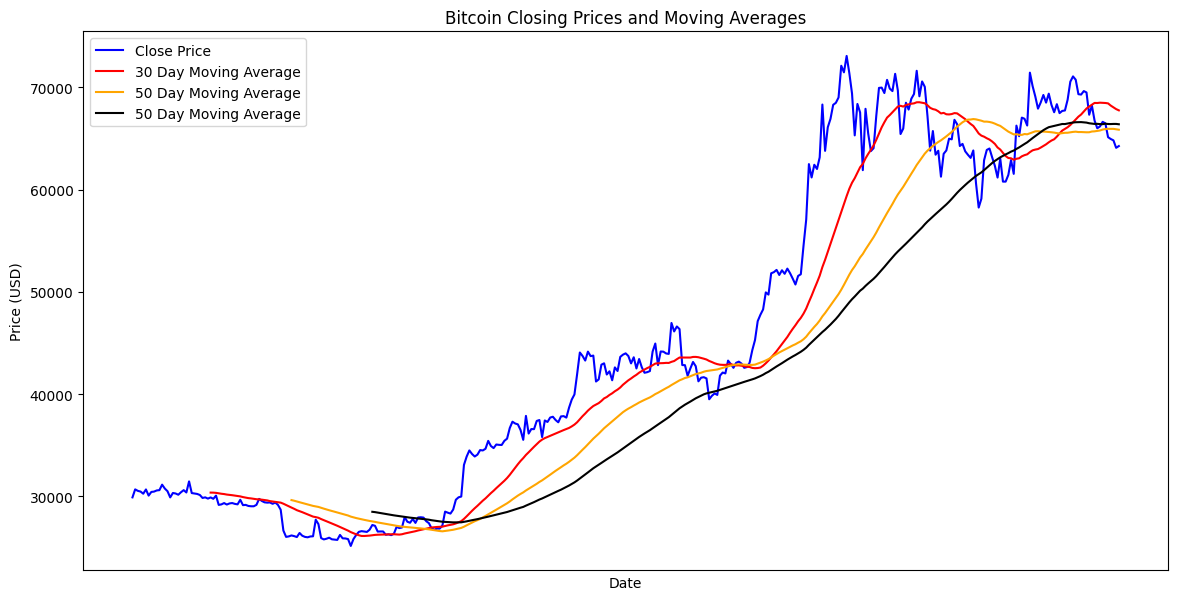

In [10]:

# Ensure 'Date' is a datetime type and set as index
new_df = df.copy()
# new_df.set_index('Date', inplace=True)

# Calculate moving averages
#MA=moving average
new_df['30 Day MA'] = new_df['Close'].rolling(window=30).mean()

new_df['60 Day MA'] = new_df['Close'].rolling(window=60).mean()
new_df['90 Day MA'] = new_df['Close'].rolling(window=90).mean()

# Plot closing prices and moving averages
plt.figure(figsize=(14, 7))
plt.plot(new_df['Close'], label='Close Price', color='blue')
plt.plot(new_df['30 Day MA'], label='30 Day Moving Average', color='red')
plt.plot(new_df['60 Day MA'], label='50 Day Moving Average', color='orange')
plt.plot(new_df['90 Day MA'], label='50 Day Moving Average', color='black')

plt.title('Bitcoin Closing Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks([])


Text(0, 0.5, 'PRICE(USD)')

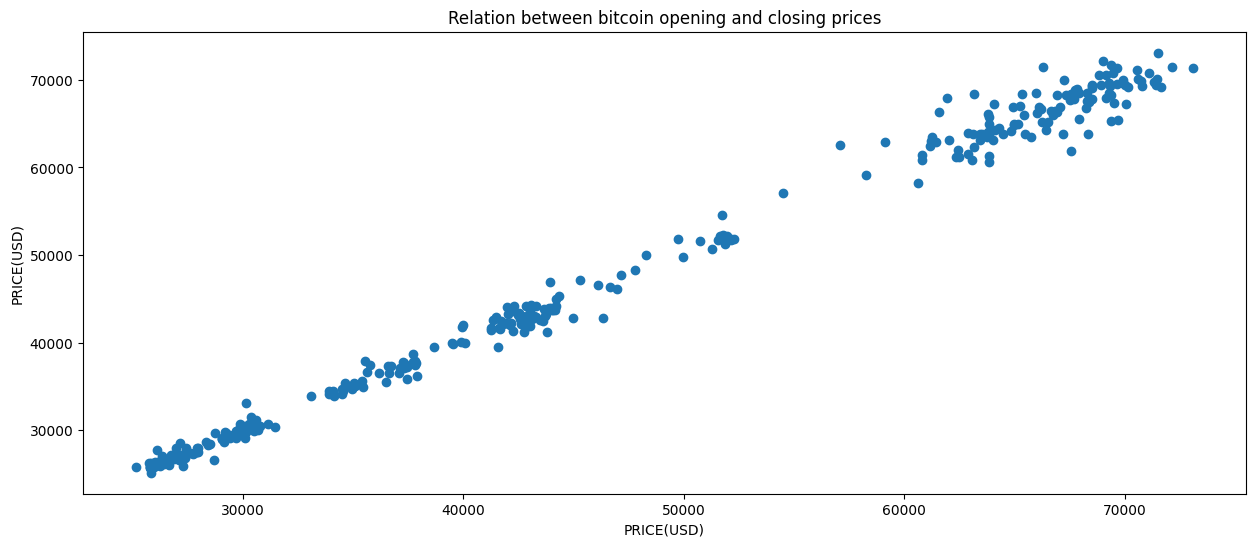

In [11]:
plt.scatter(df['Open'],df['Close'])
plt.title('Relation between bitcoin opening and closing prices')
plt.xlabel('PRICE(USD)')
plt.ylabel('PRICE(USD)')

Text(0, 0.5, 'PRICE(USD)')

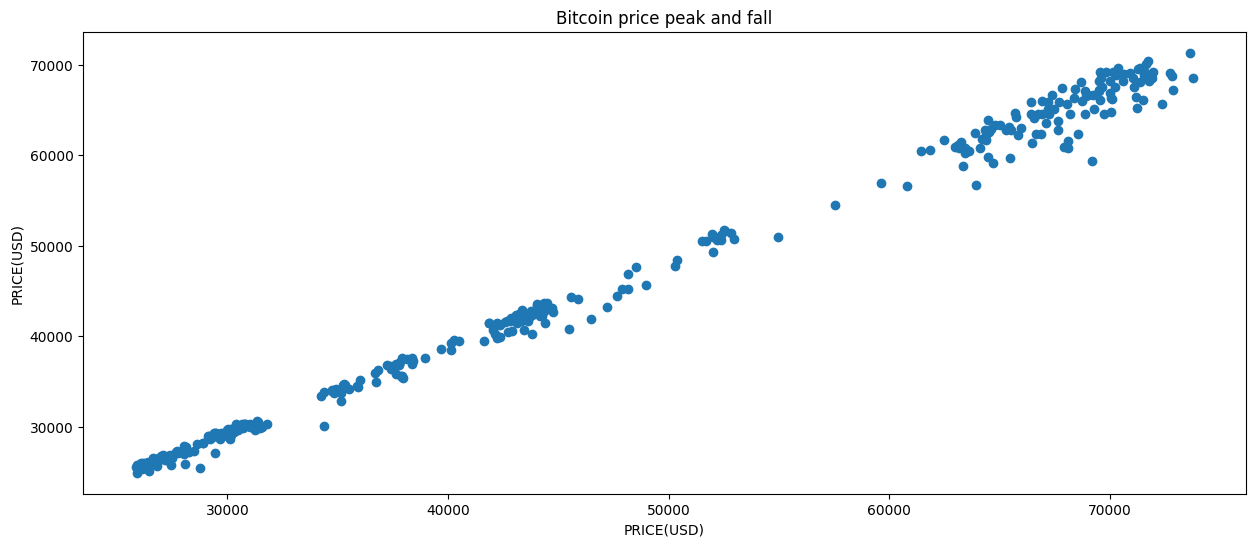

In [12]:
plt.scatter(df['High'],df['Low'])
plt.title('Bitcoin price peak and fall')
plt.xlabel('PRICE(USD)')
plt.ylabel('PRICE(USD)')

In [13]:
weekly_df=df[df.index%7==0]
weekly_df.head(10)

,Date,Open,High,Low,Close,Volume
0,2023-06-22,29995.935547,30495.998047,29679.158203,29912.281250,20653160491
7,2023-06-29,30086.187500,30796.250000,30057.203125,30445.351563,13180860821
14,2023-07-06,30507.150391,31460.052734,29892.226563,29909.337891,21129219509
21,2023-07-13,30387.488281,31814.515625,30268.351563,31476.048828,23686079548
28,2023-07-20,29915.250000,30195.531250,29638.095703,29792.015625,14655207121
35,2023-07-27,29353.798828,29560.966797,29099.351563,29210.689453,10770779217
42,2023-08-03,29161.812500,29375.707031,28959.488281,29178.679688,12780357746
49,2023-08-10,29563.972656,29688.564453,29354.447266,29429.591797,11865344789
56,2023-08-17,28699.802734,28745.947266,25409.111328,26664.550781,31120851211
63,2023-08-24,26431.519531,26554.910156,25914.925781,26162.373047,12871532023


Text(0.5, 1.0, 'Bitcoin price variation over the past year')

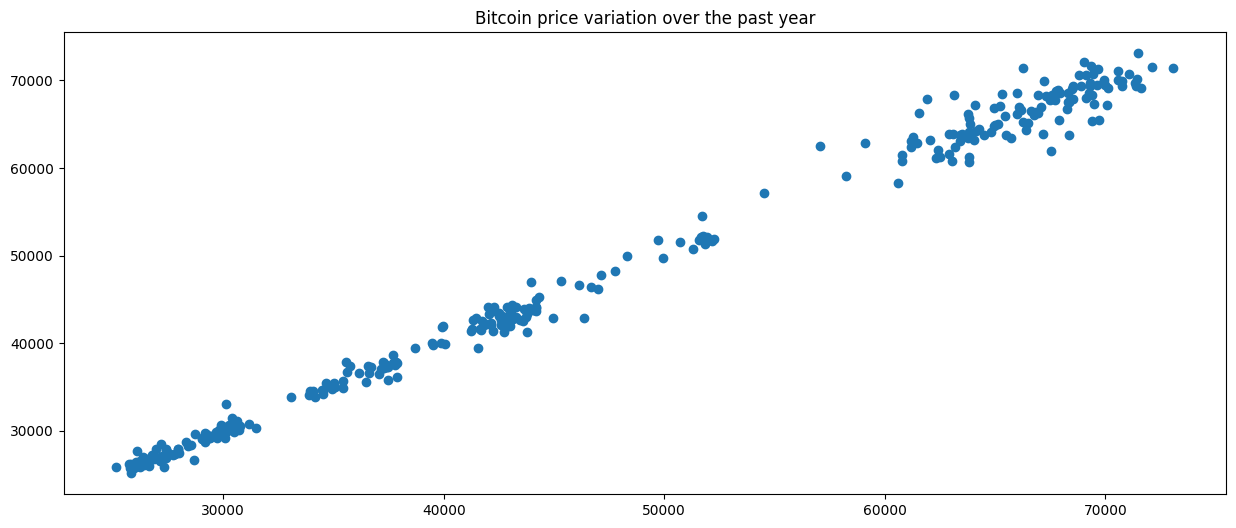

In [14]:
plt.scatter(df['Open'],df['Close'])
plt.title('Bitcoin price variation over the past year')

Text(0.5, 1.0, 'Weekly bitcoin opening price variations')

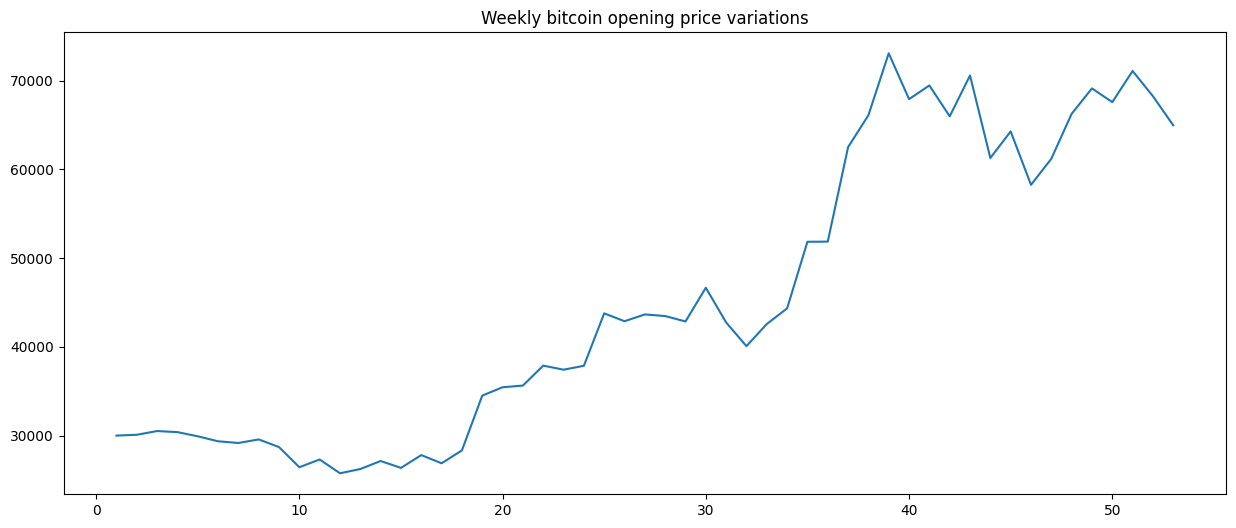

In [15]:
plt.plot(range(1,54),weekly_df['Open'])
plt.title('Weekly bitcoin opening price variations')

In [16]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [17]:
features=['High','Low','Close','Volume']
target=['Open']
X_train, X_test, y_train, y_test =train_test_split(df[features], df[target], test_size = 0.2,random_state=0)



In [18]:
## LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)


confidence:  0.9989126024136299


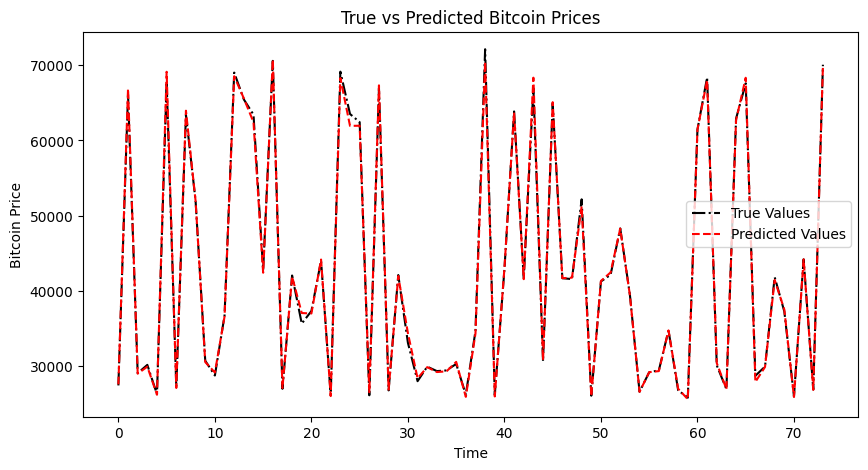

In [28]:

# Plot true vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='True Values', linestyle='dashdot',color='black')
plt.plot(y_pred, label='Predicted Values', linestyle='--',color='red')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.title('True vs Predicted Bitcoin Prices')
plt.show()


In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)

524.2009767684261
